# Лабораторная работа 1. Введение в машинное обучение. Обучение с учителем. Задача регрессии

<b>Традиционное предупреждение для всех лабораторных работ:</b> перед обучением моделей необходимо выполнить предварительную обработку данных, которая <b>обязательно</b> включает в себя:
- заполнение пропущенных значений (рекомедуется логика заполнения пропусков на основе типа данных, которая использовалась в РГР по Практикуму);
- преобразование категориальных признаков в числовые (используйте one-hot кодирование или map; используйте знания с Практикума).

Предобработка может включать в себя другие действия, но выполнение описанных выше действий обязательно.

Сделайте это один раз и сохраните в отдельный csv файл, а потом его используйте.

<b>Выполните следующие задания:</b>
- загрузите датасет для регрессии, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (линейная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (полиномиальная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- вычислите значения метрик $R^2$, MAE, MSE, RMSE, MAPE для всех обученных моделей; выберите лучшую модель;
- самостоятельно реализуйте (желательно в виде класса) модель линейной регрессии с регуляризацией (можете выбрать L1 или L2);
- самостоятельно реализуйте вычисление всех используемых метрик (в виде функций, принимающих два аргумента);
- обучите вашу модель линейной регрессии на ваших данных; оцените качество с помощью реализованных вами метрик.

In [35]:
import pandas as pd
import numpy as np

In [36]:
data = pd.read_csv('../data/regression/moldova_cars_task.csv')
X = data.drop('Price(euro)', axis=1) # предикторы 
y = data['Price(euro)']
X

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission
0,Toyota,Prius,2011.0,Hatchback,195000.0,1800.0,Hybrid,Automatic
1,Renault,Grand Scenic,2014.0,Universal,135000.0,1500.0,Diesel,Manual
2,Volkswagen,Golf,1998.0,Hatchback,1.0,1400.0,Petrol,Manual
3,Renault,Laguna,2012.0,Universal,110000.0,1500.0,Diesel,Manual
4,Opel,Astra,2006.0,Universal,200000.0,1600.0,Metan/Propan,Manual
...,...,...,...,...,...,...,...,...
41002,Dacia,NaN,2015.0,Universal,89000.0,1500.0,Diesel,Manual
41003,Renault,Modus,2009.0,Hatchback,225.0,1500.0,Diesel,Manual
41004,Mercedes,E Class,2016.0,Sedan,50000.0,1950.0,Diesel,Automatic
41005,Mazda,6,2006.0,Combi,370000.0,2000.0,Diesel,Manual


In [37]:

from category_encoders.binary import BinaryEncoder

In [38]:
X['Model'] = X['Model'].fillna(X['Model'].mode()[0])
X['Distance'] = X['Distance'].fillna(X['Distance'].mean())
X['Year'] = X['Year'].fillna(X['Year'].mean())
X['Transmission'] = X['Transmission'].fillna(X['Transmission'].mode()[0])
X = pd.get_dummies(X,columns=['Transmission','Fuel_type'])
X = X.drop('Style',axis=1)
X = X.drop('Model',axis=1)
bn = BinaryEncoder()
X = bn.fit_transform(X)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [40]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
from math import sqrt


In [41]:

lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {r2_score(y_test, y_pred)}')


MAE: 5020.109521779532
MSE: 8171788794.539853
RMSE: 90397.94684913952
MAPE: 1.5948680664156285
R^2: 0.005408233195122847


In [42]:
ridge = Ridge(alpha=0.9).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {r2_score(y_test, y_pred)}')

MAE: 5020.00868353361
MSE: 8171840019.900745
RMSE: 90398.23018124163
MAPE: 1.594775007439833
R^2: 0.00540199853543244


c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.61391e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [43]:
lasso = Lasso(alpha=0.9).fit(X_train, y_train)
y_pred = lasso.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {r2_score(y_test, y_pred)}')


MAE: 5019.097071229115
MSE: 8172397139.720867
RMSE: 90401.3116039854
MAPE: 1.5935914636542567
R^2: 0.005334191253557163


In [44]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

In [45]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [46]:
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
ridge_optimal.best_params_

c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.32213e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.55375e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.1815e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.17365e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\malya\Desktop\маш об

{'alpha': 0.9}

In [47]:
from sklearn.preprocessing import PolynomialFeatures as pf
p = pf(3)  

X_p_train = p.fit_transform(X_train) 
X_p_test = p.fit_transform(X_test)

In [48]:
parameters = {'alpha': np.arange(0, 1, 0.1)}
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_p_train, y_train)
ridge_optimal.best_params_


KeyboardInterrupt: 

In [49]:

lr2 = LinearRegression().fit(X_p_train, y_train)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {r2_score(y_test, y_pred)}')

MAE: 5019.097071229115
MSE: 8172397139.720867
RMSE: 90401.3116039854
MAPE: 1.5935914636542567
R^2: 0.005334191253557163


In [50]:
ridge = Ridge(alpha=0.1).fit(X_p_train, y_train)
y_pred = ridge.predict(X_p_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {r2_score(y_test, y_pred)}')

MAE: 5678.283708466809
MSE: 9138053402.808907
RMSE: 95593.16608842343
MAPE: 2.415128169155998
R^2: -0.11219622870451373


In [16]:
lasso = Lasso(alpha=0.1).fit(X_p_train, y_train)
y_pred = lasso.predict(X_p_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {r2_score(y_test, y_pred)}')

MAE: 5295.824832902159
MSE: 11838170044.161634
RMSE: 108803.35493063454
MAPE: 0.8764094470135277
R^2: -0.4370940432234851


c:\Users\malya\Desktop\маш обуч\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.725e+11, tolerance: 2.969e+08
  model = cd_fast.enet_coordinate_descent(


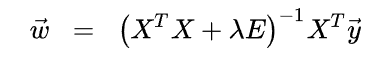

In [2]:
from pathlib import Path
import os
import sys

sys.path.append(str(Path(os.getcwd()).parent))

from src.linearRegres import LinerReg
from src.metrics import Metrics
from src.Ridge import Ridges

model = LinerReg(0.000001)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
c = Metrics(y_test,y_preds)
c.call()

ridge_preg = Ridges()

ridge_preg.fit(X_train,y_train)
y_ridge_pred = ridge_preg.predict(X_test)

y = Metrics(y_test,y_ridge_pred)
print()
y.call()

ModuleNotFoundError: No module named 'src.linearRegres'